# Predicting strokes using Machine Learning

## Data Preparation

### Import required libraries 

In [16]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [17]:
#load the dataset
df = pd.read_csv('Titanic Dataset.csv')

In [18]:
#Read the first 5 lines of the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#Read the last 5 lines
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
#Get the shape of the data set
df.shape

(891, 12)

In [21]:
#Analyze the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


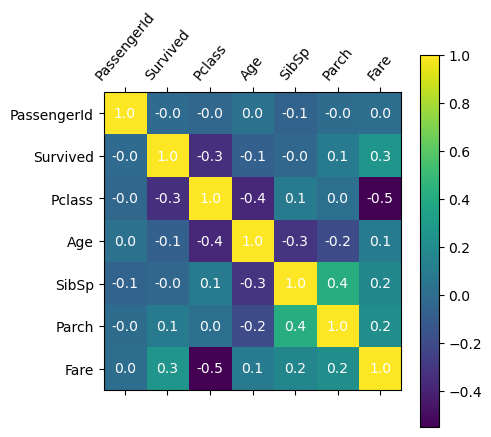

In [22]:
#Ploting the correlation between the output(stroke) and individual features
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 50) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=10)


In [23]:
#Correlation
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Preprocess the data

In [24]:
#Dropping Unneccesary columns
df.drop(["PassengerId"],axis=1,inplace=True) # not relavent and corelation is 0
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Cabin"],axis=1,inplace=True) # more misssing value
df.drop(["Ticket"],axis=1,inplace=True)

In [25]:
#Get the shape of the dataset
df.shape

(891, 8)

In [26]:
#check for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [27]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
# Replace datapoints with medium in relevant columns
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
# Drop datapoints with missing values in relevant columns


In [31]:
# Get data types of columns
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [32]:
#View count of cells with object data type
for x in df.select_dtypes(include = 'object'):
    print(df[x].value_counts())
    print("")

male      577
female    312
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



## Encoding Categorical data

In [33]:
# change_values = {
#   'Sex': {
#     'male': 0,
#     'female': 1
#   }
# }

# df.replace(change_values, inplace=True)

In [34]:
# Keep backup of dataframe to maintain idempotency of the following cell
df_bak = df

In [35]:
# Encode 'Embarked' , 'Sex 'columns with numerical values using one hot encoding

transformer = make_column_transformer(
  (OneHotEncoder(), ['Embarked', 'Sex']),
  remainder='passthrough',
  verbose_feature_names_out=False
)

# Load backup dataframe to maintain idempotency
df = df_bak

transformed = transformer.fit_transform(df)
df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
df.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [36]:
df.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


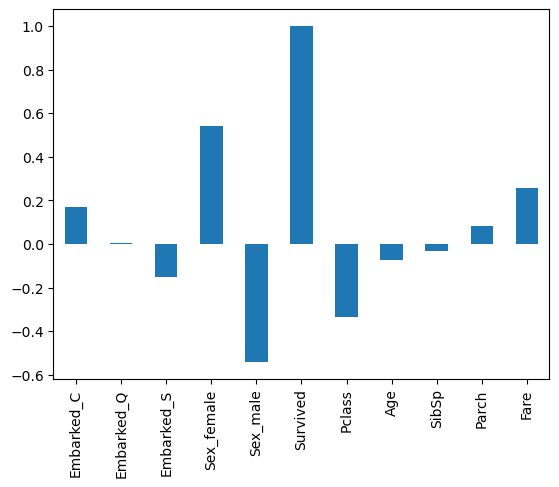

In [37]:
#plotting the correlation between target variable and other columns
Correlation=df.corrwith(df["Survived"])
Correlation.plot(kind='bar')
plt.show()

## Training the Model

In [38]:
y = df["Survived"]
x = df.drop(["Survived"],axis=1)

### Scaling data
Values are in different scales so values needed to be convert into same scale

In [39]:
#Scaling data
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.48271079, -0.30794088,  0.61679395, ...,  0.43135024,
        -0.47432585, -0.50023975],
       [ 2.07163382, -0.30794088, -1.62128697, ...,  0.43135024,
        -0.47432585,  0.78894661],
       [-0.48271079, -0.30794088,  0.61679395, ..., -0.47519908,
        -0.47432585, -0.48664993],
       ...,
       [-0.48271079, -0.30794088,  0.61679395, ...,  0.43135024,
         2.00611934, -0.17408416],
       [ 2.07163382, -0.30794088, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.0422126 ],
       [-0.48271079,  3.24737656, -1.62128697, ..., -0.47519908,
        -0.47432585, -0.49017322]])

### Split dataset into training and test sets

In [40]:
#Splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
#Preparing the dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

# Before Oversampling

## SVC

In [42]:
# Create a model using SVC classifier
model = SVC()
# Train the model using the training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'SVC', 'Accuracy': acc}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

SVC Classifier scores
Model accuracy	: 0.8202247191011236
Percentage	: 82.0%
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       109
         1.0       0.80      0.71      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

Confusion Matrix - 
[[97 12]
 [20 49]]


## Decision Tree

In [43]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': acc}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

Decision Tree Classifier scores
Model accuracy	: 0.7584269662921348
Percentage	: 75.8%
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       109
         1.0       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178

Confusion Matrix - 
[[82 27]
 [16 53]]


In [44]:
#Print the model and respective accuracy
print("Model and it's respective accuracy before oversampling - ")
print(model_accuracy)

Model and it's respective accuracy before oversampling - 
           Model  Accuracy
0            SVC  0.820225
1  Decision Tree  0.758427


### Inspect for data inbalance

<Axes: xlabel='Survived', ylabel='count'>

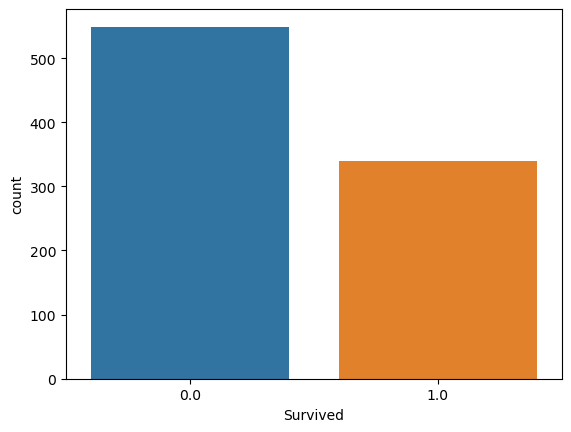

In [45]:
sns.countplot(x='Survived',data=df)

In [46]:
#Count number of people who has experienced a stroke or not
df['Survived'].value_counts()

#Percentage of people who had a stroke
print("Percentage of people who had a stroke = ")
len(df[df['Survived'] == 1])/len(df)*100

Percentage of people who had a stroke = 


38.24521934758155

### Oversample the data

<Axes: xlabel='Survived', ylabel='count'>

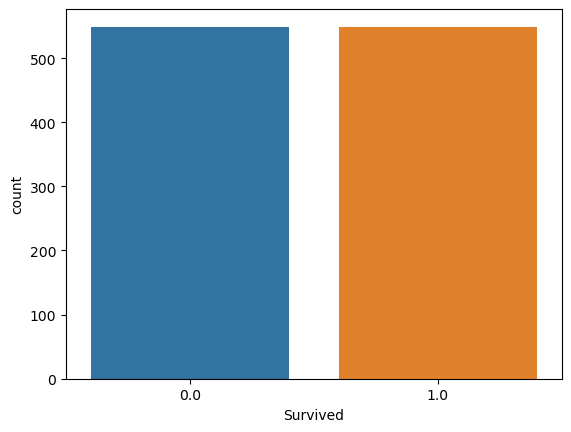

In [47]:
# Oversample data to fix the data imbalance
x, y = SMOTE().fit_resample(x, y)

# Inspect data balance
sns.countplot(x=y, data=df)

In [48]:
#Resplit the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# After OverSampling

In [49]:
#Preparing the dataframe to print the models and their respecrive accuracy
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])

## SVC

In [50]:
# Create a model using SVC classifier
model = SVC()
# Train the model using the training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

y_pred = model.predict(x_test)

print('SVC Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'SVC', 'Accuracy': acc}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

SVC Classifier scores
Model accuracy	: 0.8318181818181818
Percentage	: 83.2%
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       113
         1.0       0.86      0.79      0.82       107

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220

Confusion Matrix - 
[[99 14]
 [23 84]]


## Decision Tree

In [51]:
#Create a model using DecisionTree
model = DecisionTreeClassifier()
#Train the model using training set
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Test the model using the testing set
acc = model.score(x_test, y_test)

print('Decision Tree Classifier scores')
print(f'Model accuracy\t: {acc}')
print(f'Percentage\t: {"{:.1%}".format(acc)}')
print(classification_report(y_test, y_pred))
model_accuracy = model_accuracy.append({'Model': 'Decision Tree', 'Accuracy': acc}, ignore_index=True)
# Getting the confusion matrix
print('Confusion Matrix - ')
print(confusion_matrix(y_test, y_pred))

Decision Tree Classifier scores
Model accuracy	: 0.7727272727272727
Percentage	: 77.3%
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       113
         1.0       0.75      0.80      0.77       107

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220

Confusion Matrix - 
[[84 29]
 [21 86]]


In [52]:
#Print the model and respective accuracy
print("Model and it's respective accuracy after oversampling - ")
print(model_accuracy)

Model and it's respective accuracy after oversampling - 
           Model  Accuracy
0            SVC  0.831818
1  Decision Tree  0.772727


In [53]:
df.shape

(889, 11)